Data pre-processing in Python

pandas contains a DataFrame class that has various methods for data cleaning. Methods that change data contain an optional inplace parameter. If inplace is True, changes are made in the input dataframe. If inplace is False, changes are returned in a new dataframe.

Another library that provides different data visualizations for understanding the existence and distribution of missing data is missingno. missingno uses four types of data visualization: bar plots, matrix plots, heatmaps, and dendrograms.

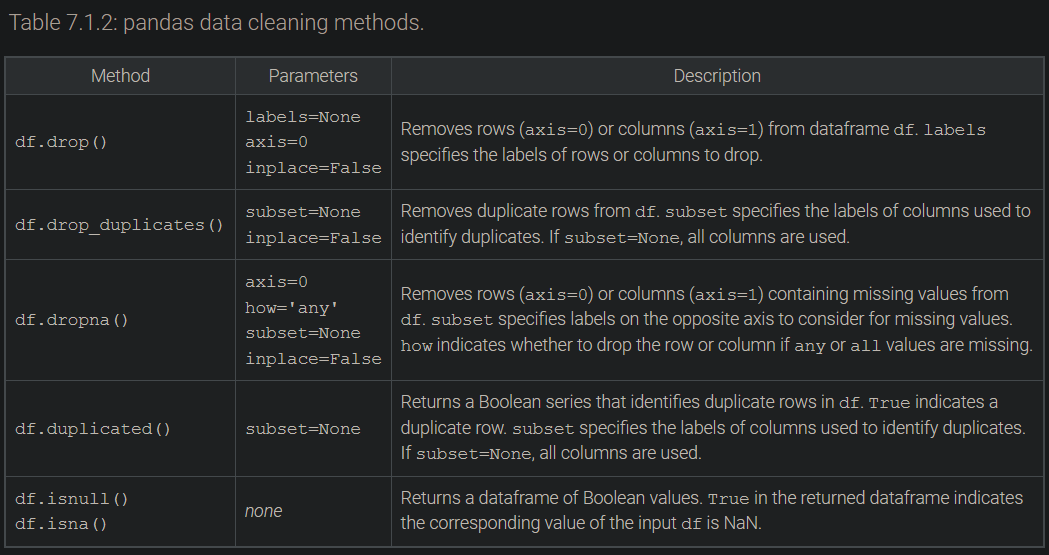

In [2]:
# Loads the pandas and missingno libraries
import pandas as pd
import missingno as msno

In [2]:
# Loads the rent.csv dataset and uses the following feature:
# beds, baths, sqft, nhood, city, county, address, and price
rent = pd.read_csv('rent.csv')
rent = rent[['beds','baths','sqft','nhood','city','county','address','price']]

In [3]:
# Displays the number of non-missing values for each feature
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   beds     194188 non-null  float64
 1   baths    42675 non-null   float64
 2   sqft     64679 non-null   float64
 3   nhood    200796 non-null  object 
 4   city     200796 non-null  object 
 5   county   199402 non-null  object 
 6   address  3908 non-null    object 
 7   price    200796 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 12.3+ MB


In [4]:
# Counts the number of missing values for each feature
rent.isnull().sum()

beds         6608
baths      158121
sqft       136117
nhood           0
city            0
county       1394
address    196888
price           0
dtype: int64

In [5]:
# Displays the proportion of missing values for each feature by county
rent.isnull().groupby(rent["county"]).sum().div(rent.groupby(rent["county"]).size(),0)

,beds,baths,sqft,nhood,city,county,address,price
county,,,,,,,,
alameda,0.030784,0.800312,0.701092,0.0,0.0,0.0,0.982364,0.0
contra costa,0.026828,0.752223,0.615730,0.0,0.0,0.0,0.979125,0.0
marin,0.032126,0.845599,0.653733,0.0,0.0,0.0,0.987986,0.0
napa,0.040275,0.837986,0.550572,0.0,0.0,0.0,0.986728,0.0
san francisco,0.035510,0.795765,0.812812,0.0,0.0,0.0,0.978109,0.0
san mateo,0.034710,0.766978,0.740154,0.0,0.0,0.0,0.985894,0.0
santa clara,0.030008,0.749775,0.548497,0.0,0.0,0.0,0.976135,0.0
santa cruz,0.039232,0.837602,0.501513,0.0,0.0,0.0,0.987194,0.0
solano,0.029396,0.787012,0.601817,0.0,0.0,0.0,0.964725,0.0


In [6]:
# Removes the address feature
rent.drop(axis=1, labels=['address'])

,beds,baths,sqft,nhood,city,county,price
0,2.0,2.0,NaN,alameda,alameda,alameda,1250
1,2.0,NaN,NaN,alameda,alameda,alameda,1295
2,2.0,NaN,NaN,alameda,alameda,alameda,1100
3,1.0,NaN,735.0,alameda,alameda,alameda,1425
4,1.0,NaN,NaN,alameda,alameda,alameda,890
...,...,...,...,...,...,...,...
200791,2.0,NaN,NaN,yountville,yountville,napa,1850
200792,2.0,NaN,NaN,yountville,yountville,napa,1950
200793,2.0,2.0,1300.0,yountville,yountville,napa,2600
200794,2.0,NaN,1000.0,yountville,yountville,napa,1900


In [7]:
# Drops all instances with missing values
rent.dropna()

,beds,baths,sqft,nhood,city,county,address,price
515,2.0,1.0,1080.0,alameda,alameda,alameda,659,2250
714,2.0,1.0,950.0,alameda,alameda,alameda,497,2650
959,2.0,1.0,800.0,alameda,alameda,alameda,2105,1950
1034,2.0,1.0,950.0,alameda,alameda,alameda,497,2650
1118,4.0,1.0,1716.0,alameda,alameda,alameda,1116,3295
...,...,...,...,...,...,...,...,...
200346,3.0,2.0,1360.0,willow glen / cambrian,cambrian,santa clara,2638,2990
200367,1.0,1.0,800.0,willow glen / cambrian,cambrian,santa clara,2469,2049
200378,1.0,1.0,720.0,willow glen / cambrian,cambrian,santa clara,1804,1825
200404,2.0,2.0,1050.0,willow glen / cambrian,cambrian,santa clara,328,1949


<AxesSubplot: >

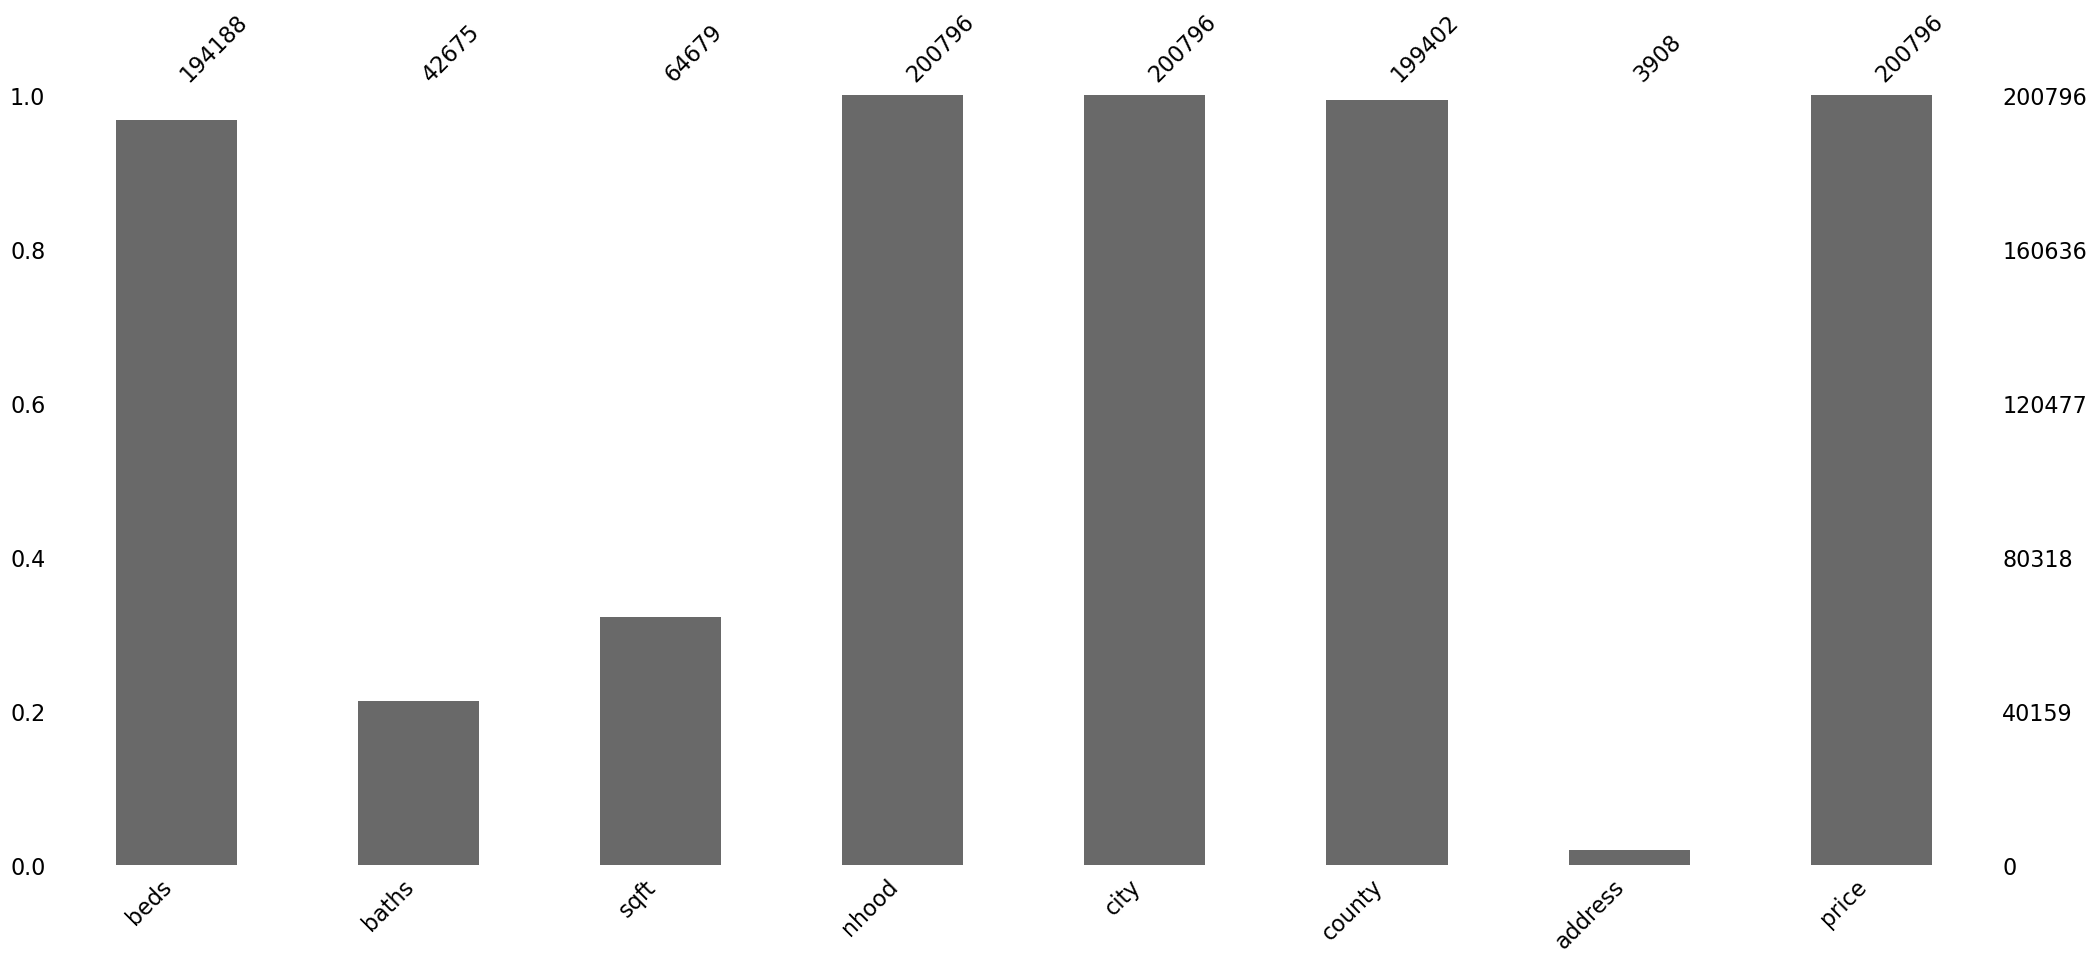

In [8]:
# Displays a bar chart for the number of missing values for each feature
msno.bar(rent)

<AxesSubplot: >

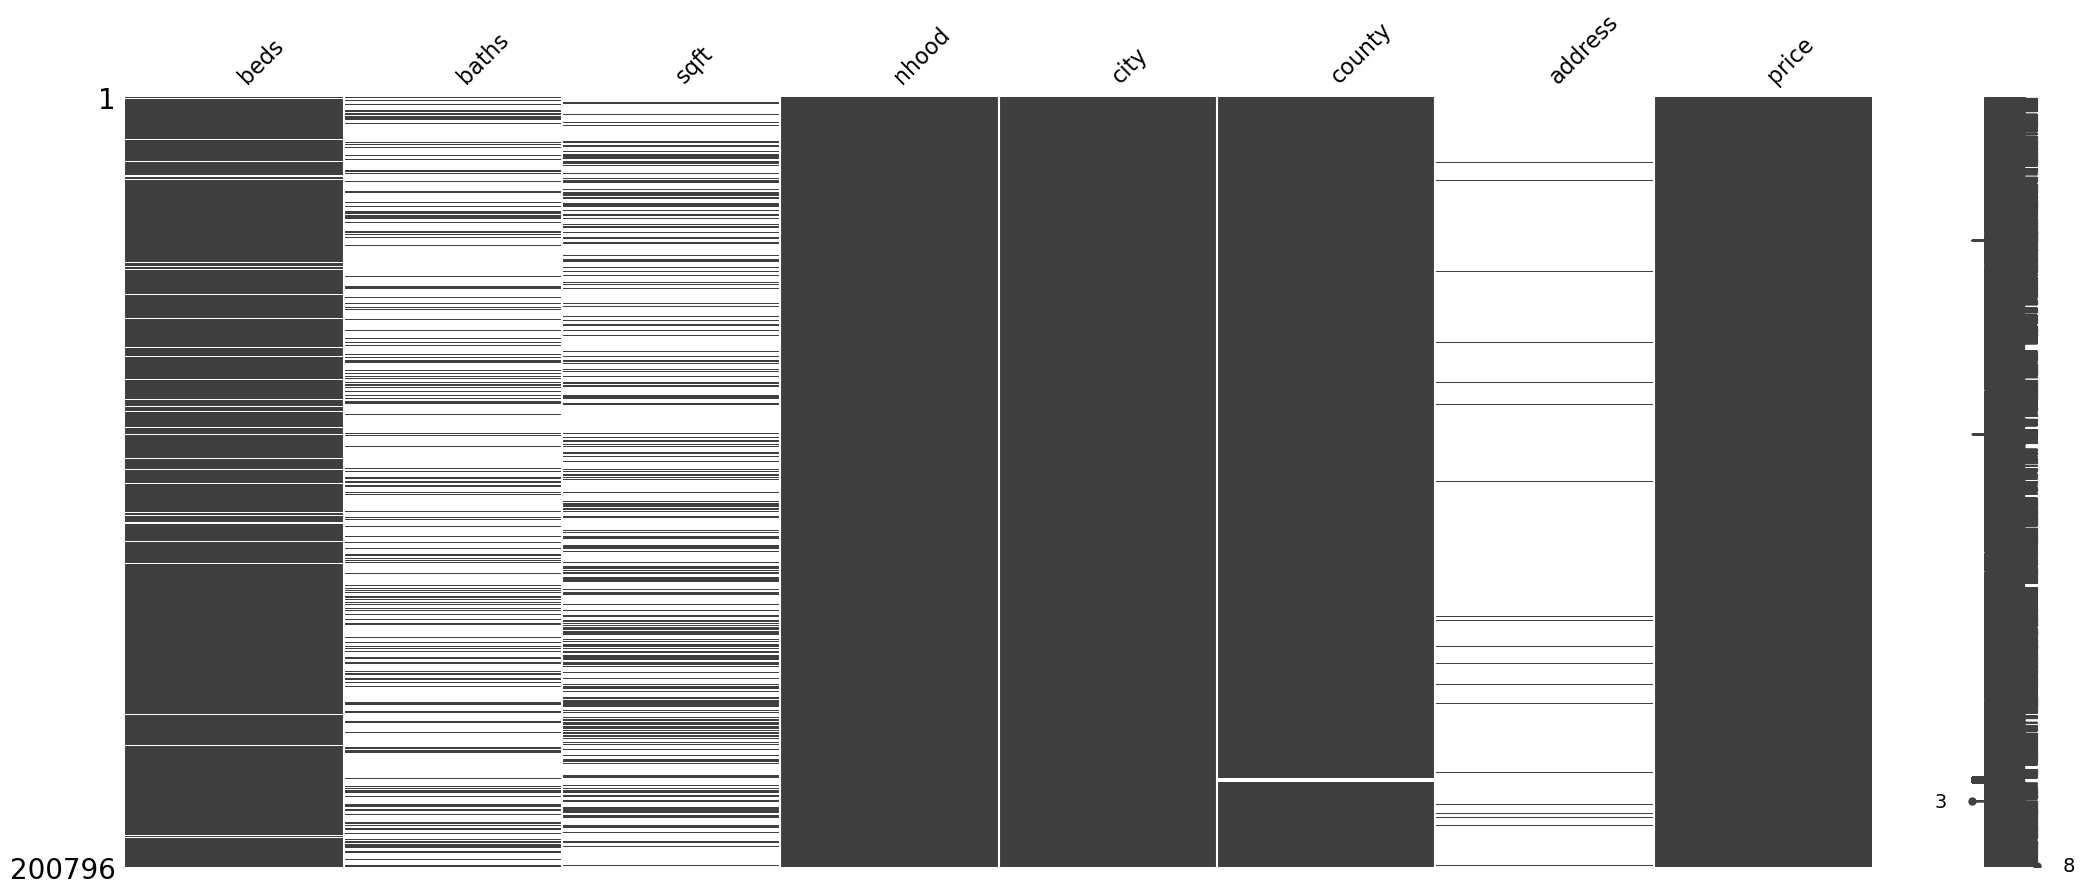

In [9]:
# Displays the distribution of missing values for different features
msno.matrix(rent)

<AxesSubplot: >

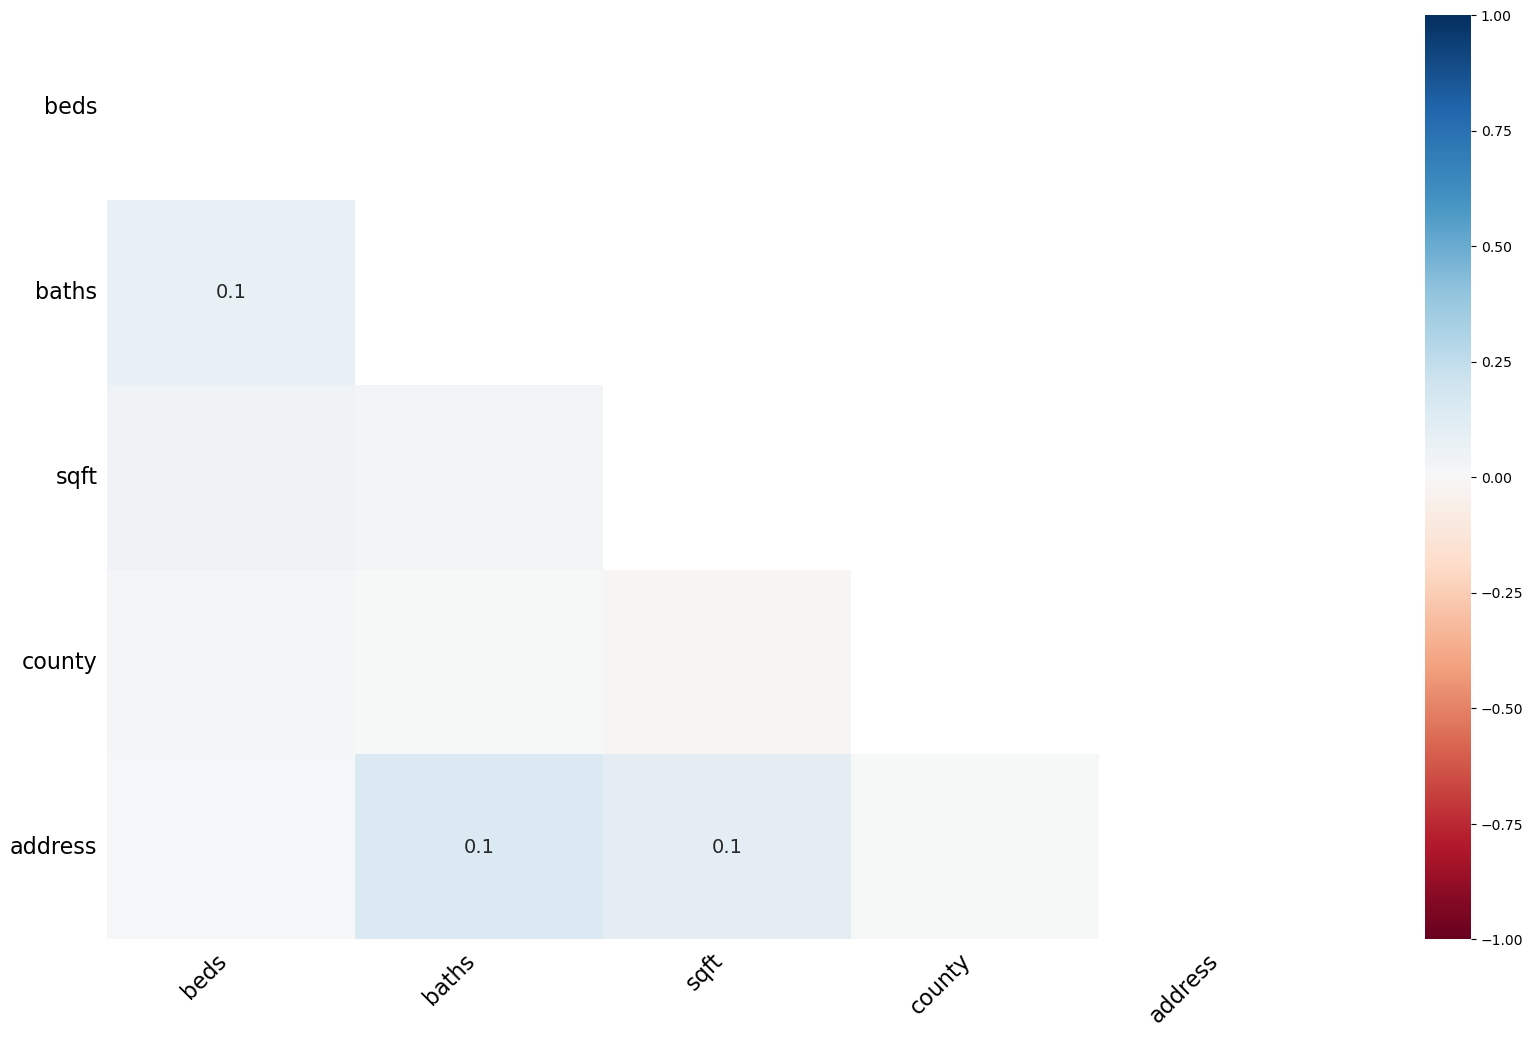

In [10]:
# Displays the nullity correlation matrix for a pair of features
msno.heatmap(rent)